# 1. Binary Classification Example

In [1]:
import mikegrad as mg
from mikegrad.nn import MLP

In [2]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, 0.0, 0.0, 1.0] # desired targets
xs, ys = mg.from_list(xs), mg.from_list(ys)

In [3]:
mlp = MLP(nin=3, 
          nouts=[4, 4, 1],
          act= mg.nn.Sigmoid(),
          out_act= mg.nn.Sigmoid()
          )
mlp

In [4]:
from tqdm import tqdm

def train(mlp, xs, ys, loss_fn, lr=1e-2, nepochs=100):
    for i in tqdm(range(nepochs)):
        ypred = [mlp(x) for x in xs]
        #loss = sum([(yp - yt)**2 for yp, yt in zip(ypred, ys)]) # mse loss
        loss = loss_fn(ypred, ys)
        # print(f"Epoch [{i+1}/{nepochs}] | Loss: {loss.data:.6f}")
        for p in mlp.parameters():
            p.grad = 0.0
        loss.backward()
        for p in mlp.parameters():
            p.data -= lr * p.grad    

In [5]:
from mikegrad.losses import BCELoss

lr=0.1
nepochs=1000
loss_fn = BCELoss()
train(mlp, xs, ys, loss_fn, lr, nepochs)

100%|██████████| 1000/1000 [00:02<00:00, 447.79it/s]


In [6]:
ypred = [mlp(x) for x in xs]
loss = loss_fn(ypred, ys)

print(f"Loss: {loss.data:.6f}")

print("Predictions:")
print([round(yp.data, 2) for yp in ypred])
print("Targets:")
print([yt.data for yt in ys])

Loss: 0.029166
Predictions:
[0.97, 0.02, 0.04, 0.96]
Targets:
[1.0, 0.0, 0.0, 1.0]


# 2. Multiclass Classification Example

In [7]:
import mikegrad as mg
from mikegrad.nn import MLP

In [8]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [-3.0, 0.01, 0.5],
  [0.5, -1.0, 1.0],
  [1.0, 1.0, -1.0],
  [-2.4, 0.03, 0.6]
]

ys = [1, 0, 2, 0, 1, 2] # desired targets

xs, ys = mg.from_list(xs), mg.from_list(ys)
NUM_CLASSES = 3

In [9]:
mlp = MLP(nin=3, 
          nouts=[8, 8, NUM_CLASSES],
          act= mg.nn.Sigmoid(),
          out_act= mg.nn.Softmax()
          )
mlp

In [10]:
from tqdm import tqdm

def train(mlp, xs, ys, loss_fn, lr=1e-2, nepochs=100):
    for i in tqdm(range(nepochs)):
        ypred = [mlp(x) for x in xs]
        #loss = sum([(yp - yt)**2 for yp, yt in zip(ypred, ys)]) # mse loss
        loss = loss_fn(ypred, ys)
        # print(f"Epoch [{i+1}/{nepochs}] | Loss: {loss.data:.6f}")
        for p in mlp.parameters():
            p.grad = 0.0
        loss.backward()
        for p in mlp.parameters():
            p.data -= lr * p.grad    

In [11]:
from mikegrad.losses import CrossEntropyLoss

lr=0.1
nepochs=1000
loss_fn = CrossEntropyLoss()
train(mlp, xs, ys, loss_fn, lr, nepochs)

100%|██████████| 1000/1000 [00:17<00:00, 56.93it/s]


In [12]:
ypred = [mlp(x) for x in xs]
loss = loss_fn(ypred, ys)

print(f"Loss: {loss.data:.6f}")

print("Predictions:")
print([mg.argmax(yp) for yp in ypred])
print("Targets:")
print([yt.data for yt in ys])

Loss: 0.023669
Predictions:
[1, 0, 2, 0, 1, 2]
Targets:
[1, 0, 2, 0, 1, 2]


In [13]:
ypred

[[Value(data=0.011130726327233371),
  Value(data=0.984895996341854),
  Value(data=0.003973277330912545)],
 [Value(data=0.9822483815653344),
  Value(data=0.014192862356565864),
  Value(data=0.003558756078099876)],
 [Value(data=0.015576560603280843),
  Value(data=0.008213631496927278),
  Value(data=0.9762098078997918)],
 [Value(data=0.97182369784122),
  Value(data=0.008330458878764962),
  Value(data=0.019845843280015034)],
 [Value(data=0.0202580739375767),
  Value(data=0.9715510653715581),
  Value(data=0.008190860690865135)],
 [Value(data=0.01964635155586016),
  Value(data=0.007345637078301378),
  Value(data=0.9730080113658384)]]

# 3. Regression Example

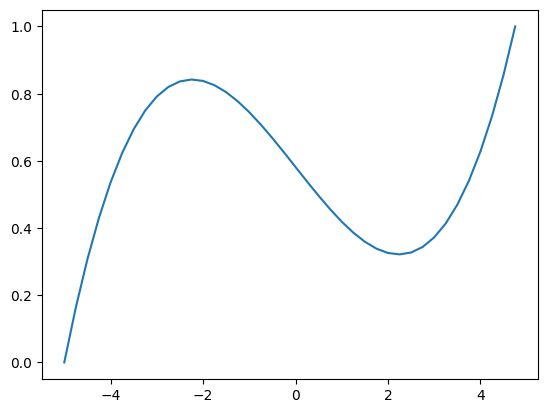

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/5)*x**3 - 3*x + 4

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
# min max scaling to ys to be in [0, 1]
ys = (ys - ys.min())/(ys.max() - ys.min())

plt.plot(xs, ys)
xs = [[x] for x in xs]

In [15]:
from tqdm import tqdm

def train(mlp, xs, ys, loss_fn, lr=1e-2, nepochs=100):
    for i in tqdm(range(nepochs)):
        ypred = [mlp(x) for x in xs]
        #loss = sum([(yp - yt)**2 for yp, yt in zip(ypred, ys)]) # mse loss
        loss = loss_fn(ypred, ys)
        # print(f"Epoch [{i+1}/{nepochs}] | Loss: {loss.data:.6f}")
        for p in mlp.parameters():
            p.grad = 0.0
        loss.backward()
        for p in mlp.parameters():
            p.data -= lr * p.grad    

In [16]:
from mikegrad.losses import MSELoss

mlp = MLP(1, [8, 1])
lr=0.5
nepochs=2000
loss_fn = MSELoss()

train(mlp, xs, ys, loss_fn, lr, nepochs)

100%|██████████| 2000/2000 [00:43<00:00, 46.36it/s]


In [17]:
y_preds = [mlp(x) for x in xs]

loss = loss_fn(y_preds, ys)
print(f"Loss: {loss.data:.6f}")

Loss: 0.001179


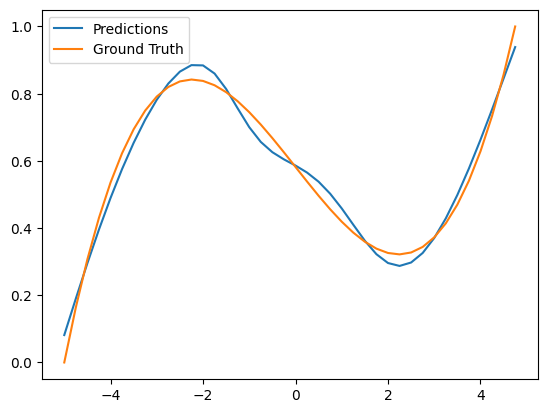

In [18]:
plt.plot(xs, [y.data for y in y_preds])
plt.plot(xs, ys)
plt.legend(['Predictions', 'Ground Truth'])